|컬럼명|	설명|
|-|-|
|id|	상품의 고유 식별자|
|cost|	상품의 원가|
|category|	상품의 카테고리 (예: 'tops', 'bottoms', 'accessories' 등)|
|name|	상품의 이름|
|brand|	상품의 브랜드|
|retail_price|	상품의 소매 가격|
|department|	상품이 속한 부서 (예: 'women', 'men' 등)|
|sku|	상품의 재고 관리 코드 (Stock Keeping Unit)|
|distribution_center_id|	상품이 보관된 물류 센터의 ID|

In [1]:
import os
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import pltfont
pltfont.auto()

✅ 현재 폰트 적용됨: Arial Unicode MS


In [2]:
data_path = "/Users/jun/GitStudy/commerceAB/data/thelook_ecommerce"
data_list = os.listdir(data_path)
data_list.sort()
data_list

['distribution_centers_gzip.parquet',
 'inventory_items_gzip.parquet',
 'order_items_gzip.parquet',
 'orders_gzip.parquet',
 'products_gzip.parquet',
 'users_gzip.parquet']

In [3]:
cols = [i.rstrip("_gzip.parquet") for i in data_list ]

cols

['distribution_centers',
 'inventory_items',
 'order_items',
 'orders',
 'products',
 'users']

In [4]:
products_file_path = data_path + "/products_gzip.parquet"
products_df = pd.read_parquet(products_file_path, engine='pyarrow')  # 또는 engine='fastparquet'

In [5]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  Int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  Int64  
dtypes: Int64(2), float64(2), object(5)
memory usage: 2.1+ MB


In [6]:
products_df.describe(include='all',datetime_is_numeric=True)

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
count,29120.0,29120.000000,29120,29118,29096,29120.000000,29120,29120,29120.0
unique,<NA>,NaN,26,27309,2756,NaN,2,29120,<NA>
top,<NA>,NaN,Intimates,Wrangler Men's Premium Performance Cowboy Cut ...,Allegra K,NaN,Women,EBD58B8A3F1D72F4206201DA62FB1204,<NA>
freq,<NA>,NaN,2363,8,1034,NaN,15989,1,<NA>
mean,14560.5,28.481774,NaN,NaN,NaN,59.220164,NaN,NaN,4.982898
std,8406.364256,30.624681,NaN,NaN,NaN,65.888927,NaN,NaN,2.901153
min,1.0,0.008300,NaN,NaN,NaN,0.020000,NaN,NaN,1.0
25%,7280.75,11.275613,NaN,NaN,NaN,24.000000,NaN,NaN,2.0
50%,14560.5,19.675081,NaN,NaN,NaN,39.990002,NaN,NaN,5.0
75%,21840.25,34.440000,NaN,NaN,NaN,69.949997,NaN,NaN,8.0


In [7]:
products_df.isnull().sum()

id                         0
cost                       0
category                   0
name                       2
brand                     24
retail_price               0
department                 0
sku                        0
distribution_center_id     0
dtype: int64

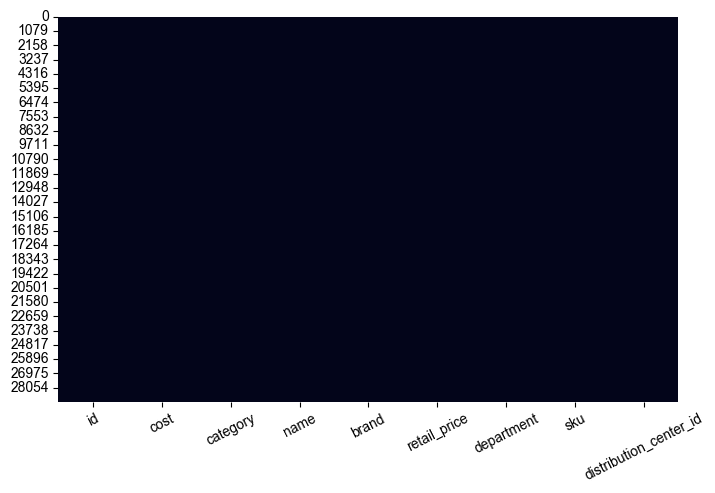

In [8]:
plt.figure(figsize=(8,5))  # 전체 그림 크기 지정
sns.heatmap(products_df.isnull(), cbar=False)
plt.xticks(rotation=27)  # x축 라벨 기울이기
plt.show()